In [1]:
import powerlaw
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
#Read in csv files
onek_fp = "Biology/Data/KEGG_Samples/KEGG_fragments_1000cpds_occurances.csv"
twok_fp = "Biology/Data/KEGG_Samples/KEGG_fragments_2000cpds_occurances.csv"
threek_fp = "Biology/Data/KEGG_Samples/KEGG_fragments_3000cpds_occurances.csv"
fourk_fp = "Biology/Data/KEGG_Samples/KEGG_fragments_4000cpds_occurances.csv"
sample_labels = {"Biology/Data/KEGG_Samples/KEGG_fragments_1000cpds_occurances.csv": "1k Samples",
                "Biology/Data/KEGG_Samples/KEGG_fragments_2000cpds_occurances.csv": "2k Samples",
                "Biology/Data/KEGG_Samples/KEGG_fragments_3000cpds_occurances.csv": "3k Samples",
                "Biology/Data/KEGG_Samples/KEGG_fragments_4000cpds_occurances.csv": "4k Samples"}

In [4]:
#Power law fits
results = powerlaw.Fit(archaea_df["Occurances"].tolist())
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')
print(R, p) #R is negative if the second fit is better, p is significant value for that direction)

Calculating best minimal value for power law fit
/Users/John/anaconda2/lib/python2.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


2.747927338653702
1499.0
(-26.166045919929992, 5.700517340267158e-06)


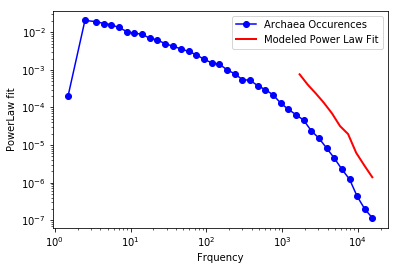

In [5]:
#Power law plotting
powerlaw.plot_pdf(archaea_df["Occurances"].tolist(), color="b", marker="o", label="Archaea Occurences")
results.plot_pdf(color="r", linewidth=2, label="Modeled Power Law Fit")
plt.xlabel("Frquency")
plt.ylabel("PowerLaw fit")
plt.legend()

In [11]:
#Distribution fits
def find_best_distribution(data):
  dist_names = ['weibull_min','norm','weibull_max','beta',
              'invgauss','uniform','gamma','expon',   
              'lognorm','pearson3','triang']

  chi_square_statistics = []
  # 11 equi-distant bins of observed Data 
  percentile_bins = np.linspace(0,100,11)
  percentile_cutoffs = np.percentile(data, percentile_bins)
  observed_frequency, bins = (np.histogram(data, bins=percentile_cutoffs))
  cum_observed_frequency = np.cumsum(observed_frequency)

  # Loop through candidate distributions
  for distribution in dist_names:
      # Set up distribution and get fitted distribution parameters
      dist = getattr(stats, distribution)
      param = dist.fit(data)
      #print("{}\n{}\n".format(dist, param))


      # Get expected counts in percentile bins
      # cdf of fitted sistrinution across bins
      cdf_fitted = dist.cdf(percentile_cutoffs, *param)
      expected_frequency = []
      for bin in range(len(percentile_bins)-1):
          expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
          expected_frequency.append(expected_cdf_area)

      # Chi-square Statistics
      expected_frequency = np.array(expected_frequency) * len(data)
      cum_expected_frequency = np.cumsum(expected_frequency)
      ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
      chi_square_statistics.append(ss)


  #Sort by minimum ch-square statistics
  results = pd.DataFrame()
  results['Distribution'] = dist_names
  results['chi_square'] = chi_square_statistics
  results.sort_values(['chi_square'], inplace=True)


  print ('\nDistributions listed by Betterment of fit:')
  print ('............................................')
  print (results)


In [14]:
for fp in [onek_fp, twok_fp, threek_fp, fourk_fp]:
    df = pd.read_csv(fp) 
    find_best_distribution(df["Occurances"].tolist())


Distributions listed by Betterment of fit:
............................................
   Distribution     chi_square
8       lognorm      40.121726
4      invgauss     333.315049
9      pearson3     723.582884
0   weibull_min     801.896360
3          beta    1681.341472
7         expon   15987.940188
1          norm   84082.106189
10       triang  123935.023894
5       uniform  128767.475847
6         gamma  130142.442244
2   weibull_max  137436.223463

Distributions listed by Betterment of fit:
............................................
   Distribution     chi_square
8       lognorm      26.854754
4      invgauss     495.049195
0   weibull_min    2012.067693
9      pearson3   11592.783844
7         expon   43818.192344
3          beta   85360.653992
1          norm  217194.056979
10       triang  307140.912091
6         gamma  315849.518895
5       uniform  318806.497228
2   weibull_max  334179.635628

Distributions listed by Betterment of fit:
..................................

/Users/John/anaconda2/lib/python2.7/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)



Distributions listed by Betterment of fit:
............................................
   Distribution     chi_square
8       lognorm      79.208082
4      invgauss    1225.763076
3          beta   11414.811589
0   weibull_min   15298.896170
9      pearson3   44322.440405
7         expon  104312.785245
1          norm  523211.345950
10       triang  753815.104681
6         gamma  765782.741495
5       uniform  775413.750219
2   weibull_max  806119.225185


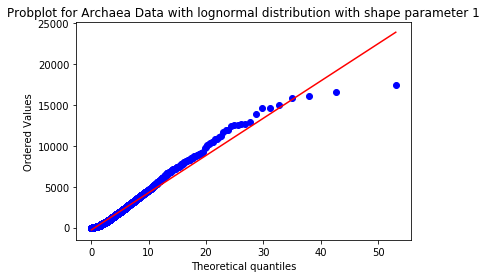

In [9]:
#Probplot of lognormal distribution
fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(archaea_df["Occurances"], dist="lognorm", plot=ax, sparams=(1,))
#//TODO: what is this shape parameter? (and why does 1 work so well)
ax.set_title("Probplot for Archaea Data with lognormal distribution with shape parameter 1")
plt.show()

# Distribution Comparisons
KS & Anderson-Darling tests

In [2]:
onek_fp = "Biology/Data/KEGG_Samples/KEGG_fragments_1000cpds_occurances.csv"
onek_df = pd.read_csv(onek_fp)

twok_fp = "Biology/Data/KEGG_Samples/KEGG_fragments_2000cpds_occurances.csv"
twok_df = pd.read_csv(twok_fp)

threek_fp = "Biology/Data/KEGG_Samples/KEGG_fragments_3000cpds_occurances.csv"
threek_df = pd.read_csv(threek_fp)

fourk_fp = "Biology/Data/KEGG_Samples/KEGG_fragments_4000cpds_occurances.csv"
fourk_df = pd.read_csv(fourk_fp)

fivek_fp = "Biology/Data/KEGG_Samples/KEGG_fragments_5000cpds_occurances.csv"
fivek_df = pd.read_csv(fivek_fp)

In [3]:
#1k and 4k
print("KS")
print(stats.ks_2samp(onek_df["Occurances"], fourk_df["Occurances"]))
print("Anderson Darling")
print(stats.anderson_ksamp([onek_df["Occurances"].tolist(), fourk_df["Occurances"].tolist()]))

KS
Ks_2sampResult(statistic=0.15312247343239316, pvalue=0.0)
Anderson Darling
Anderson_ksampResult(statistic=2437.0141266109986, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=inf)


/Users/John/anaconda2/lib/python2.7/site-packages/scipy/stats/morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


In [18]:
#3k and 4k
print("KS")
print(stats.ks_2samp(threek_df["Occurances"], fourk_df["Occurances"]))
print("Anderson Darling")
print(stats.anderson_ksamp([threek_df["Occurances"].tolist(), fourk_df["Occurances"].tolist()]))

KS
Ks_2sampResult(statistic=0.03063985937499636, pvalue=3.8950466305907957e-60)
Anderson Darling
Anderson_ksampResult(statistic=249.64374974878888, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=inf)


In [4]:
#4k and 5k
print("KS")
print(stats.ks_2samp(fourk_df["Occurances"], fivek_df["Occurances"]))
print("Anderson Darling")
print(stats.anderson_ksamp([fourk_df["Occurances"].tolist(), fivek_df["Occurances"].tolist()]))

KS
Ks_2sampResult(statistic=0.03057877608518339, pvalue=5.059552959783144e-83)
Anderson Darling
Anderson_ksampResult(statistic=389.37909519917815, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=inf)
